In [111]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

In [112]:
# TODO: show visualization


In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [114]:
df1 = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

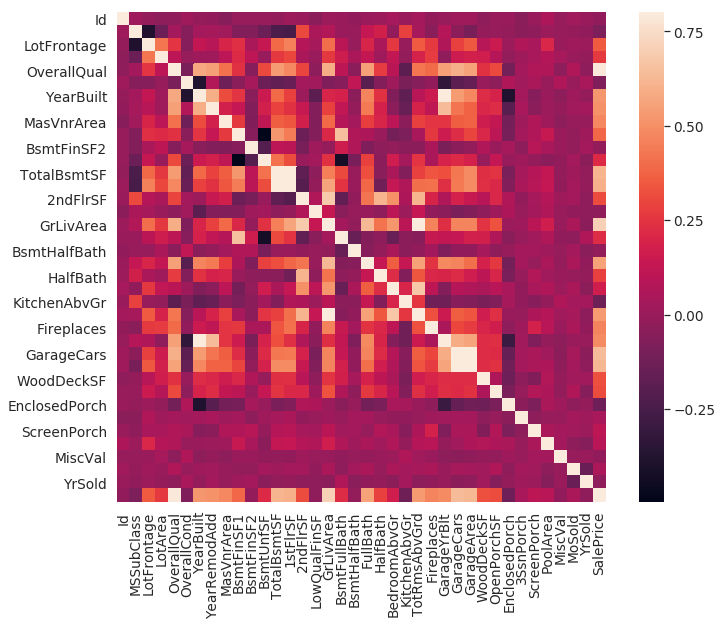

In [115]:
corrmat = df1.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

This heatmap shows an overview of all the values and how do are they correlated. Although this does not provide a very thorough picture of what is happening, it does give us an overall view and we can see some postive and negative correlation. We see that Year Built vs Enclosed Porch are inversely correlated. This might be due to the increase in population. As the population has been increasing, the land allowed for each home to be made gets lesser and hence the dip. We also see that the TotRmsAbvGr i.e.Total Rooms and GrLivArea i.e. Ground Live Area are highly correlated.

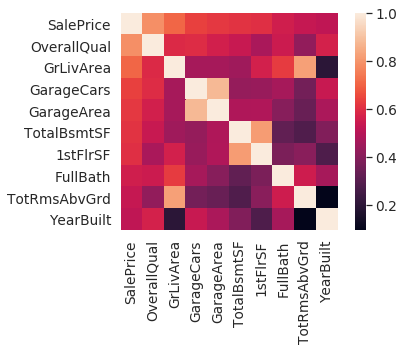

In [116]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, square=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)
plt.show()

This heatmap provides a much thorough view of the 10 most correlated values. Again, we see that Total Rooms above ground and year built have a negative correlation whereas GarageCars i.e. the number of cars that can be fit into the garage and the GarageArea i.e. the total area of the garage are highly correlated.

In [117]:
print (corrmat['SalePrice'].sort_values(ascending=False)[:10], '\n') #top 10 values
print ('----------------------')
print (corrmat['SalePrice'].sort_values(ascending=False)[-10:]) #last 10 values`

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

----------------------
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Here, we want to show the negative correlation with our target variable which is like KitchenAbvGrd and EnclosedPorch which seems relevant as the decreased porch means that the area is crowded one hence lesser porch means more amount.

## Part 2 - Informative Plots

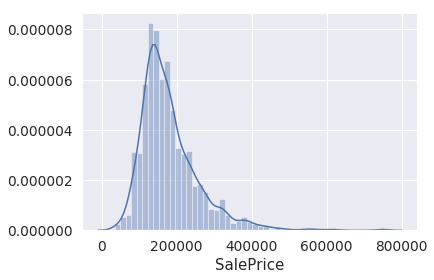

In [118]:
# TODO: code to generate Plot 1
sns.distplot(df1['SalePrice'])

This plot shows us the SalePrice which is skewed. This means that the normal housing costs somewhere around 200000 at Ames. Well much cheaper than anywhere here in NY.

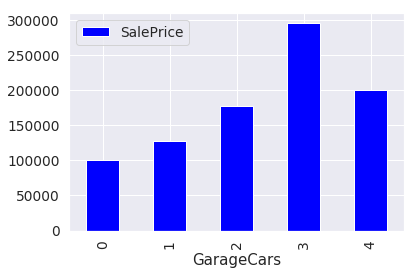

In [119]:
# TODO: code to generate Plot 2
pivot = df1.pivot_table(index='GarageCars', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='blue')

This plot tells us that a house which has place for 3 cars cost more than a place for 4 cars. Why might this happen? Well this might be due to the fact that when the capacity of the car space increases, the living space is decreased and the total land for the house also decrease, making the place go down in price.

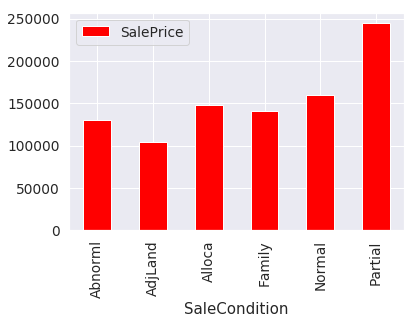

In [120]:
# TODO: code to generate Plot 3
sp_pivot = df1.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
sp_pivot.plot(kind='bar', color='red')

It seems that people love Partial housing. They dont want the whole thing. 

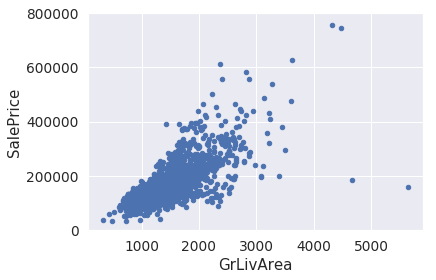

In [121]:
# TODO: code to generate Plot 4
data = pd.concat([df1['SalePrice'], df1['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

This graph shows that GrLivArea, i.e. Ground Live Area is highly correlated to SalePrice as we can see that trend sees to be linear and is actually very self explanatory. But, we also see some outliers in the data. We see that a living area of around 5000 has a lesser price which seems odd and might be an outlier or faulty entry. 

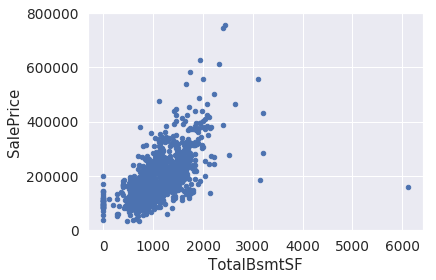

In [122]:
# TODO: code to generate Plot 5
data = pd.concat([df1['SalePrice'], df1['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

This is also a very intutive graph and shows that the more the area, more is the price. 


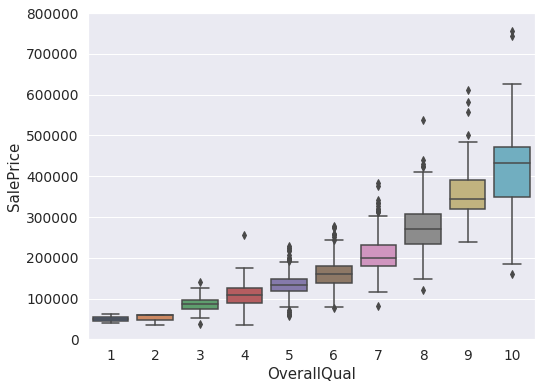

In [123]:
var = 'OverallQual'
data = pd.concat([df1['SalePrice'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

This again shows a linear relation. This essentially means that as the quality goes up, we find that the price also goes up. This is very intuitive and is also inherently true.

## Data Cleaning

In [124]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
ntrain = df1.shape[0]
ntest = test.shape[0]
y_train = df1.SalePrice.values
all_data = pd.concat((df1, test), sort=False).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 80)


In [125]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


Here, we see that PoolQC is the mostly missing data which might be correct as many of them do not have a pool attached to their house.Similar for Alley,MiscFetaure,FirePlaceQu. We can see that these features do not add much value and hence they can deleted. Garage values have same missing values and hence that can also be deleted. Now, SaleType. BsmtFinSf2, BsmtUnfSF, TotalBsmtSf all have 1 missing values which might mean that there is 1 row that has all these missing values. 

In [126]:
all_data = all_data.drop((missing_data[missing_data['Total'] > 1]).index,1)
all_data = all_data.drop((missing_data[missing_data['Total'] == 1]).index,1)
all_data.isnull().sum().max()

0

In [127]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [128]:
train['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

## Part 3 - Handcrafted Scoring Function

In [129]:
# TODO: code for scoring function
df2 = train
f = df2.groupby(['GrLivArea']).mean()
# g = f.rank(1,'SalePrice')
g1 = df1.groupby('Neighborhood').mean()['SalePrice'].rank(ascending=True)
g2 = df1.groupby('GrLivArea').mean()['SalePrice'].rank(ascending=True)
g3 = df1.groupby('OverallQual').mean()['SalePrice'].rank(ascending=True)
g4 = df1.groupby('GarageCars').mean()['SalePrice'].rank(ascending=True)
g5 = df1.groupby('GarageArea').mean()['SalePrice'].rank(ascending=True)
g6 = df1.groupby('TotalBsmtSF').mean()['SalePrice'].rank(ascending=True)
g7 = df1.groupby('1stFlrSF').mean()['SalePrice'].rank(ascending=True)
g8 = df1.groupby('FullBath').mean()['SalePrice'].rank(ascending=True)
g9 = df1.groupby('TotRmsAbvGrd').mean()['SalePrice'].rank(ascending=True)
g10 = df1.groupby('YearBuilt').mean()['SalePrice'].rank(ascending=True)

t1 = g1.to_dict()
t2 = g2.to_dict()
t3 = g3.to_dict()
t4 = g4.to_dict()
t5 = g5.to_dict()
t6 = g6.to_dict()
t7 = g7.to_dict()
t8 = g8.to_dict()
t9 = g9.to_dict()
t10 = g10.to_dict()

train1 = pd.DataFrame()

cols = ['Neighborhood','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
        'TotRmsAbvGrd','YearBuilt'] 
for x in cols:
    train1[x] = df1[x]
train1.head()

,Neighborhood,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,CollgCr,7,1710,2,548,856,856,2,8,2003
1,Veenker,6,1262,2,460,1262,1262,2,6,1976
2,CollgCr,7,1786,2,608,920,920,2,6,2001
3,Crawfor,7,1717,3,642,756,961,1,7,1915
4,NoRidge,8,2198,3,836,1145,1145,2,9,2000


In [130]:
t90 = pd.DataFrame()
def score_fn():
    c = train1['Neighborhood'].count()
    lst = list(range(c))
    print(train1)
    for i in lst:
        j = int(i) 
        t = train1.iloc[j]['Neighborhood']
        f = t1[t]
        train1.set_value(j, 'Neighborhood', f)
    t90 = train1
    print(t90)
    train1['Sum'] = train1.sum(axis=1)
    #train1['Neighborhood']
    t3 = train1.nlargest(10, ['Sum'])
    t5 = train1.nsmallest(10, ['Sum'])
    for index, row in train1.iterrows():
        x1 = row['Neighborhood']
        for item in g1.items():
            if item[1] == x1:
                t3.set_value(index, 'Neighborhood', item[0])
                
    for index, row in train1.iterrows():
        x1 = row['Neighborhood']
        for item in g1.items():
            if item[1] == x1:
                t5.set_value(index, 'Neighborhood', item[0])
    t4 = t3.nlargest(10, ['Sum'])
    t6 = t5.nlargest(10, ['Sum'])
    return t4,t6
    
    

![](http://)What is the ten most desirable houses?

In [131]:
t4,t6 = score_fn()
t4

     Neighborhood  OverallQual  GrLivArea  GarageCars  GarageArea  \
0         CollgCr            7       1710           2         548   
1         Veenker            6       1262           2         460   
2         CollgCr            7       1786           2         608   
3         Crawfor            7       1717           3         642   
4         NoRidge            8       2198           3         836   
...           ...          ...        ...         ...         ...   
1455      Gilbert            6       1647           2         460   
1456       NWAmes            6       2073           2         500   
1457      Crawfor            7       2340           1         252   
1458        NAmes            5       1078           1         240   
1459      Edwards            5       1256           1         276   

      TotalBsmtSF  1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  
0             856       856         2             8       2003  
1            1262      1262         2    

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


     Neighborhood  OverallQual  GrLivArea  GarageCars  GarageArea  \
0              17            7       1710           2         548   
1              21            6       1262           2         460   
2              17            7       1786           2         608   
3              18            7       1717           3         642   
4              25            8       2198           3         836   
...           ...          ...        ...         ...         ...   
1455           15            6       1647           2         460   
1456           14            6       2073           2         500   
1457           18            7       2340           1         252   
1458           11            5       1078           1         240   
1459            5            5       1256           1         276   

      TotalBsmtSF  1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  
0             856       856         2             8       2003  
1            1262      1262         2    

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,Neighborhood,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,Sum
1298,Edwards,10.0,5642.0,2.0,1418.0,6110.0,4692.0,2.0,12.0,2008.0,19901.0
523,Edwards,10.0,4676.0,3.0,884.0,3138.0,3138.0,3.0,11.0,2007.0,13875.0
496,NoRidge,8.0,3228.0,2.0,546.0,3200.0,3228.0,3.0,10.0,1992.0,12242.0
1182,NoRidge,10.0,4476.0,3.0,813.0,2396.0,2411.0,3.0,10.0,1996.0,12143.0
691,NoRidge,10.0,4316.0,3.0,832.0,2444.0,2444.0,3.0,10.0,1994.0,12081.0
1373,NoRidge,10.0,2633.0,3.0,804.0,2633.0,2633.0,2.0,8.0,2001.0,10752.0
440,NridgHt,10.0,2402.0,3.0,672.0,3094.0,2402.0,2.0,10.0,2008.0,10627.0
1169,NoRidge,10.0,3627.0,3.0,807.0,1930.0,1831.0,3.0,10.0,1995.0,10241.0
224,NridgHt,10.0,2392.0,3.0,968.0,2392.0,2392.0,2.0,8.0,2003.0,10194.0
1044,NWAmes,8.0,2524.0,2.0,542.0,2524.0,2524.0,2.0,9.0,1981.0,10130.0


What is the ten least desirable houses?

In [132]:
t90

""


In [133]:
t6

,Neighborhood,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,Sum
125,IDOTRR,6.0,754.0,0.0,0.0,520.0,520.0,1.0,5.0,1935.0,3743.0
29,BrkSide,4.0,520.0,1.0,240.0,520.0,520.0,1.0,4.0,1927.0,3741.0
916,IDOTRR,2.0,480.0,1.0,308.0,480.0,480.0,0.0,4.0,1949.0,3706.0
1321,BrkSide,3.0,720.0,1.0,287.0,0.0,720.0,1.0,4.0,1949.0,3689.0
710,BrkSide,3.0,729.0,0.0,0.0,270.0,729.0,1.0,5.0,1935.0,3676.0
528,Edwards,4.0,605.0,0.0,0.0,528.0,605.0,1.0,5.0,1920.0,3673.0
1218,BrkSide,4.0,912.0,0.0,0.0,0.0,672.0,1.0,3.0,1947.0,3543.0
705,IDOTRR,4.0,1092.0,0.0,0.0,0.0,372.0,2.0,7.0,1930.0,3409.0
1100,SWISU,2.0,438.0,1.0,246.0,290.0,438.0,1.0,3.0,1920.0,3348.0
533,BrkSide,1.0,334.0,0.0,0.0,0.0,334.0,1.0,2.0,1946.0,2622.0


I have selected items that have the highest correlation with the SalePrice. To score the function, I have added the values for all numerical values and made a score for each one of them. The neighborhood has been weighted in a different way. The most taken neighborhood has been given the highest value. The rest being integer values were added as it. This helps in giving the biggest the biggest weight. So a house of area 3000>2000 and hence will give more weight to overall score. Similar to this is for the Garage Cars and YearBuilt etc

## Part 4 - Pairwise Distance Function

In [134]:
# TODO: code for distance function
cols = ['Neighborhood','OverallQual','GrLivArea','1stFlrSF','FullBath',
        'TotRmsAbvGrd','YearBuilt'] 
for x in cols:
    train1[x] = train[x]
train1.head()

,Neighborhood,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,Sum
0,CollgCr,7,1710,2,548,856,856,2,8,2003,6009.0
1,Veenker,6,1262,2,460,1262,1262,2,6,1976,6259.0
2,CollgCr,7,1786,2,608,920,920,2,6,2001,6269.0
3,Crawfor,7,1717,3,642,756,961,1,7,1915,6027.0
4,NoRidge,8,2198,3,836,1145,1145,2,9,2000,7371.0


In [135]:
train['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [136]:
from sklearn.preprocessing import LabelEncoder
train3 = train
cols = ('Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
        'HouseStyle','RoofStyle','RoofMatl','ExterQual','ExterCond','Foundation','Heating','HeatingQC','CentralAir',
        'PavedDrive','SaleCondition')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train3[c].values)) 
    train3[c] = lbl.transform(list(train3[c].values))

# shape        
print('Shape all_data: {}'.format(train3.shape))

Shape all_data: (1460, 46)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [137]:

#train90 = train1
def pairwise(a,b):
    #print(np.linalg.norm(a-b))
    return np.linalg.norm(a-b)


In [138]:
train90 = train1
train90.rename(columns={ train90.columns[0]: "Neighborhood" }, inplace = True)
c = train90['Neighborhood'].count()
lst = list(range(c))
print(train90)
for i in lst:
    j = int(i) 
    t = train90.iloc[j]['Neighborhood']
    f = t1[t]
    train90.set_value(j, 'Neighborhood', f)

train90

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


     Neighborhood  OverallQual  GrLivArea  GarageCars  GarageArea  \
0         CollgCr            7       1710           2         548   
1         Veenker            6       1262           2         460   
2         CollgCr            7       1786           2         608   
3         Crawfor            7       1717           3         642   
4         NoRidge            8       2198           3         836   
...           ...          ...        ...         ...         ...   
1455      Gilbert            6       1647           2         460   
1456       NWAmes            6       2073           2         500   
1457      Crawfor            7       2340           1         252   
1458        NAmes            5       1078           1         240   
1459      Edwards            5       1256           1         276   

      TotalBsmtSF  1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt     Sum  
0             856       856         2             8       2003  6009.0  
1            1262      12

,Neighborhood,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,Sum
0,17,7,1710,2,548,856,856,2,8,2003,6009.0
1,21,6,1262,2,460,1262,1262,2,6,1976,6259.0
2,17,7,1786,2,608,920,920,2,6,2001,6269.0
3,18,7,1717,3,642,756,961,1,7,1915,6027.0
4,25,8,2198,3,836,1145,1145,2,9,2000,7371.0
...,...,...,...,...,...,...,...,...,...,...,...
1455,15,6,1647,2,460,953,953,2,7,1999,6044.0
1456,14,6,2073,2,500,1542,2073,2,7,1978,8197.0
1457,18,7,2340,1,252,1152,1188,2,9,1941,6910.0
1458,11,5,1078,1,240,1078,1078,1,5,1950,5447.0


In [139]:
train3 = train
from sklearn.preprocessing import LabelEncoder
cols = ('Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
        'HouseStyle','RoofStyle','RoofMatl','ExterQual','ExterCond','Foundation','Heating','HeatingQC','CentralAir',
        'PavedDrive','SaleCondition')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train3[c].values)) 
    train3[c] = lbl.transform(list(train3[c].values))

# shape        
print('Shape all_data: {}'.format(train3.shape))

Shape all_data: (1460, 46)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


How well does the distance function work? When does it do well/badly?

In [140]:
train3 = train


## Part 5 - Clustering

In [141]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=280, min_samples=2, metric = pairwise).fit(train90)
clust = clustering.labels_
clust

array([0, 0, 0, ..., 0, 0, 0])

How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.

In [142]:
clust1 = pd.DataFrame(clust)
clust1[0].unique()


array([ 0,  1,  2, -1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [143]:
ytrain_pca = pd.DataFrame(clust)

In [144]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train90)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, ytrain_pca], axis = 1)
print(type(finalDf))
finalDf.rename(columns={ finalDf.columns[2]: "target" }, inplace = True)
finalDf

<class 'pandas.core.frame.DataFrame'>


,principal component 1,principal component 2,target
0,-235.736040,355.674021,0
1,44.762207,-340.774393,0
2,53.978297,354.994340,0
3,-210.277845,384.773229,0
4,1283.108636,461.501624,0
...,...,...,...
1455,-184.258005,225.319783,0
1456,2264.365100,-140.526200,15
1457,870.718733,576.336394,0
1458,-840.182515,-308.688597,0


In [145]:
type(clust)

numpy.ndarray

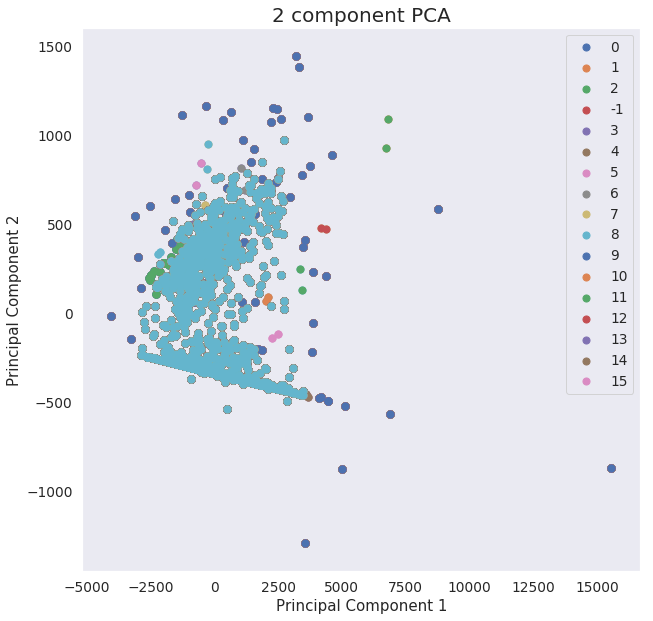

In [146]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = clust
#colors = ['r', 'g', 'b']
for target in targets:
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(clust1[0].unique())
ax.grid()

As can be seen from the figure, the clusters are based on the distance and using the pairwise method made before. Also, here we have used PCA to decrease the number of components and hence view it in a 2D form

## Part 6 - Linear Regression

In [147]:
from sklearn.preprocessing import LabelEncoder
cols = ('Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
        'HouseStyle','RoofStyle','RoofMatl','ExterQual','ExterCond','Foundation','Heating','HeatingQC','CentralAir',
        'PavedDrive','SaleCondition')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))

# shape        
print('Shape all_data: {}'.format(test.shape))

Shape all_data: (1459, 46)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [148]:
# TODO: code for linear regression
train3 = train
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()  
model1.fit(train3,y_train)
predict1 = model1.predict(train3)
predict = model1.predict(test)
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_train, predict1))

coeff_df = pd.DataFrame(model1.coef_, train3.columns, columns=['Coefficient'])  

In [149]:
y_train.shape

(1460,)

In [150]:
rms

34302.96425845283

In [151]:
coeff_df

,Coefficient
Id,-1.566255
MSSubClass,-60.696718
LotArea,0.442976
Street,29152.318379
LotShape,-1126.725301
LandContour,3081.166099
LotConfig,3.040278
LandSlope,10423.086793
Neighborhood,619.297191
Condition1,-1055.019868


How well/badly does it work? Which are the most important variables?


It gives a RMSE of 34302. We can see that it gives a lot f weightage to Street and also LandSlope. A negaitve coefficient can be seen for KitchenAbvGrd and also ExterQual. Here, the theta denote the amount of weightage given to each and every part of the model.

## Part 7 - External Dataset

In [152]:
# TODO: code to import external dataset and test
import random

In [153]:
lst =[]
for i in range(1460):
    lst.append(random.randint(1,5))
i = pd.DataFrame(lst)
i.rename(columns={ i.columns[0]: "Schools" }, inplace = True)
i
# random.randint(3,4)

,Schools
0,2
1,4
2,4
3,3
4,4
...,...
1455,3
1456,5
1457,5
1458,2


In [154]:
train4 = train
len(train4.columns)
train4.shape
ext1 = np.ones(1460)
ext1 = ext1*3
ext1 = np.transpose(ext1)
ext1 = np.reshape(ext1, (1460,1))
ext1
ext1 = pd.DataFrame(ext1)
#ext1
#ext1.rename(columns={ ext1.columns[0]: "Schools" }, inplace = True)
# train4 = pd.concat([train4,ext1],axis=1)
train4 = pd.concat([train4,i],axis=1)
y_train = pd.DataFrame(y_train)
y_train.rename(columns={ y_train.columns[0]: "Y" }, inplace = True)
train4 = pd.concat([train4,y_train],axis=1)
from scipy.stats import pearsonr
corr, _ = pearsonr(train4['Schools'], train4['Y'])
corr
#train4['Schools'].isnull().sum()

0.030610303498988183

In [155]:
train['Neighborhood'].unique()

array([ 5, 24,  6, 15, 11, 21, 14, 17,  3, 19, 16, 12, 20,  9, 10,  7, 23,
        8, 22,  4, 13,  0,  2, 18,  1])

The dataset chosen here in of how many schools are present in the vincinity of each Neighborhood. But as Ames has only around 3-4 schools around the area, there are a limited choices they have and hence a random number can be fit for that. Anything between 1-5. But still it shows some correlation if not 0. Under exact and correct circumstanes, we may get a better correlation but here, we see that this might lead to a better prediction


## Part 8 - Permutation Test

In [156]:
# TODO: code for all permutation tests
train4 = pd.DataFrame()
train4['OverallQual'] = train['OverallQual']
train5 = pd.DataFrame()
train5['GrLivArea'] = train['GrLivArea']
train6 = pd.DataFrame()
train6['Street'] = train['Street']
train7 = pd.DataFrame()
train7['KitchenAbvGr'] = train['KitchenAbvGr']
train8 = pd.DataFrame()
train8['SaleCondition'] = train['SaleCondition']
train9 = pd.DataFrame()
train9['YrSold'] = train['YrSold']
train10 = pd.DataFrame()
train10['LotArea'] = train['LotArea']
train11 = pd.DataFrame()
train11['CentralAir'] = train['CentralAir']
train12 = pd.DataFrame()
train12['FullBath'] = train['FullBath']
train13 = pd.DataFrame()
train13['HalfBath'] = train['HalfBath']


In [157]:
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()
model7 = LinearRegression()
model8 = LinearRegression()
model9 = LinearRegression()
model10 = LinearRegression()
model11 = LinearRegression()


model2.fit(train4,y_train)
model3.fit(train5,y_train)
model4.fit(train6,y_train)
model5.fit(train7,y_train)
model6.fit(train8,y_train)
model7.fit(train9,y_train)
model8.fit(train10,y_train)
model9.fit(train11,y_train)
model10.fit(train12,y_train)
model11.fit(train13,y_train)


test1 = pd.DataFrame()
test1['OverallQual'] = test['OverallQual']
test2 = pd.DataFrame()
test2['GrLivArea'] = test['GrLivArea']
test3 = pd.DataFrame()
test3['Street'] = test['Street']
test3 = pd.get_dummies(test3)
test4 = pd.DataFrame()
test4['KitchenAbvGr'] = test['KitchenAbvGr']
test5 = pd.DataFrame()
test5['SaleCondition'] = test['SaleCondition']
test5 = pd.get_dummies(test5)
test6 = pd.DataFrame()
test6['YrSold'] = test['YrSold']
test7 = pd.DataFrame()
test7['LotArea'] = test['LotArea']
test8 = pd.DataFrame()
test8['CentralAir'] = test['CentralAir']
test9 = pd.DataFrame()
test9['FullBath'] = test['FullBath']
test10 = pd.DataFrame()
test10['HalfBath'] = test['HalfBath']
#test5 = pd.get_dummies(test5)


predicted_prices2 = model2.predict(test1)
predicted_prices3 = model3.predict(test2)
predicted_prices4 = model4.predict(test3)
predicted_prices5 = model5.predict(test4)
predicted_prices6 = model6.predict(test5)
predicted_prices7 = model7.predict(test6)
predicted_prices8 = model8.predict(test7)
predicted_prices9 = model9.predict(test8)
predicted_prices10 = model10.predict(test9)
predicted_prices11 = model11.predict(test10)


y_train_com = y_train.sample(100,random_state=1)

predicted_prices2_comp = pd.DataFrame(predicted_prices2).sample(100) 
predicted_prices3_comp = pd.DataFrame(predicted_prices3).sample(100) 
predicted_prices4_comp = pd.DataFrame(predicted_prices4).sample(100) 
predicted_prices5_comp = pd.DataFrame(predicted_prices5).sample(100) 
predicted_prices6_comp = pd.DataFrame(predicted_prices6).sample(100)
predicted_prices7_comp = pd.DataFrame(predicted_prices7).sample(100) 
predicted_prices8_comp = pd.DataFrame(predicted_prices8).sample(100) 
predicted_prices9_comp = pd.DataFrame(predicted_prices9).sample(100) 
predicted_prices10_comp = pd.DataFrame(predicted_prices10).sample(100) 
predicted_prices11_comp = pd.DataFrame(predicted_prices11).sample(100)

from sklearn.metrics import mean_squared_error
#y_train_com = pd.DataFrame(y_train_com).fillna('0')
predicted_prices2_comp = predicted_prices2_comp.reset_index()
#y_train_com = y_train_com.reset_index()
np.reshape(y_train_com, (100,1))
predicted_prices2_comp.rename(columns={ predicted_prices2_comp.columns[1]: "SalePrice" }, inplace = True)
predicted_prices21_comp = pd.DataFrame()
predicted_prices21_comp['SalesPrice'] = predicted_prices2_comp['SalePrice']
print("MSE1",mean_squared_error(np.log(y_train_com), np.log(predicted_prices21_comp)))
print("MSE2",mean_squared_error(np.log(y_train_com), np.log(predicted_prices3_comp)))
print("MSE3",mean_squared_error(np.log(y_train_com), np.log(predicted_prices4_comp)))
print("MSE4",mean_squared_error(np.log(y_train_com), np.log(predicted_prices5_comp)))
print("MSE5",mean_squared_error(np.log(y_train_com), np.log(predicted_prices6_comp)))
print("MSE6",mean_squared_error(np.log(y_train_com), np.log(predicted_prices7_comp)))
print("MSE7",mean_squared_error(np.log(y_train_com), np.log(predicted_prices8_comp)))
print("MSE8",mean_squared_error(np.log(y_train_com), np.log(predicted_prices9_comp)))
print("MSE9",mean_squared_error(np.log(y_train_com), np.log(predicted_prices10_comp)))
print("MSE10",mean_squared_error(np.log(y_train_com), np.log(predicted_prices11_comp)))


# We will look at the predicted prices to ensure we have something sensible.
#print(predicted_prices2)
score_dict={}
pvalue_dict={}
pvalue_lst = []
from sklearn.model_selection import permutation_test_score
score1,perm_score, pvalue= permutation_test_score(model2, train4, y_train)
print("OverallQual", score1)
t=train4.columns.values
pvalue_dict[str(t)]=pvalue
score2,perm_score, pvalue= permutation_test_score(model3, train5, y_train)
print("GrLiveArea", score2)
t=train5.columns.values
pvalue_dict[str(t)]=pvalue
score3,perm_score, pvalue= permutation_test_score(model4, train6, y_train)
print("Steet", score3)
t=train6.columns.values
pvalue_dict[str(t)]=pvalue
score4,perm_score, pvalue= permutation_test_score(model5, train7, y_train)
print("KitchenAbvGrd", score4)
t=train7.columns.values
pvalue_dict[str(t)]=pvalue
score5,perm_score, pvalue= permutation_test_score(model6, train8, y_train)
t=train8.columns.values
print("SaleCondition",score5)
pvalue_dict[str(t)]=pvalue
#pvalue_dict

MSE1 0.29654644179500783
MSE2 0.2536328196775782
MSE3 0.17759915876877005
MSE4 0.18886329487491202
MSE5 0.19390747652286883
MSE6 0.1752988431039135
MSE7 0.17458088838859515
MSE8 0.1959718844328004
MSE9 0.2147375052725084
MSE10 0.18619685832443314


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


OverallQual 0.6247257478644835


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GrLiveArea 0.4924726967831159


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Steet -0.0006828721941014954


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KitchenAbvGrd 0.01697047945823064


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SaleCondition 0.037661224148268745


In [158]:

predicted_prices21_comp

,SalesPrice
0,176408.736044
1,221844.538637
2,221844.538637
3,221844.538637
4,312716.143823
...,...
95,130972.933451
96,176408.736044
97,130972.933451
98,267280.341230


In [159]:
y_train2 = pd.DataFrame(y_train)
y_train2.isnull().sum()

Y    0
dtype: int64

In [160]:
train4.isnull().sum()

OverallQual    0
dtype: int64

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(array([-0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003]),
 <a list of 7 Text xticklabel objects>)

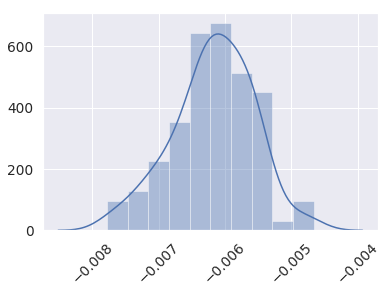

In [161]:
import random
c1=0
for i in range(100):
#     print(train4.isnull().sum())
#     print(y_train1.isnull().sum())
    train40 = pd.concat([train4, y_train2], axis=1)
#     print(train40.isnull().sum())
    train41 = train40.sample(1000)
    train41.rename(columns={ train41.columns[1]: "SalePrice" }, inplace = True)
    y_train1 = train41['SalePrice']
    train41 = train41.drop('OverallQual',axis=1)
    score,perm_score, pvalue= permutation_test_score(model2, train41, y_train1)
    c1=c1+perm_score
c1=c1/100
#c1
s = sns.distplot(c1)
plt.xticks(rotation=45)

In [162]:
train40.isnull().sum()

OverallQual    0
Y              0
dtype: int64

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(array([-0.012, -0.011, -0.01 , -0.009, -0.008, -0.007, -0.006, -0.005]),
 <a list of 8 Text xticklabel objects>)

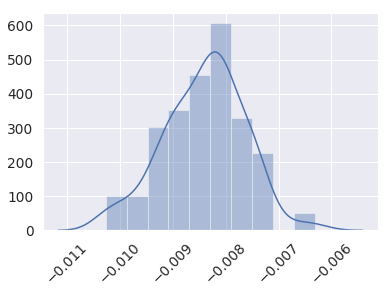

In [163]:
c2=0
for i in range(100):
    train50 = pd.concat([train5, y_train2], axis=1)
    train51 = train50.sample(750)
    train51.rename(columns={ train51.columns[1]: "SalePrice" }, inplace = True)
    y_train1 = train51['SalePrice']
    train51 = train51.drop('GrLivArea',axis=1)
    score,perm_score, pvalue= permutation_test_score(model2, train51, y_train1)
    c2=c2+perm_score
c2=c2/100
c2
s = sns.distplot(c2)
plt.xticks(rotation=45)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(array([-0.009, -0.008, -0.007, -0.006, -0.005, -0.004]),
 <a list of 6 Text xticklabel objects>)

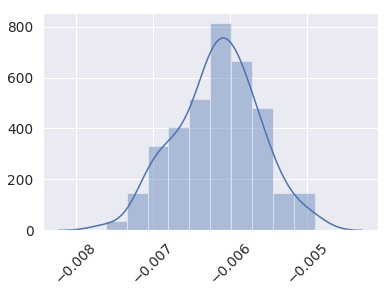

In [164]:
c3=0
for i in range(100):
    train60 = pd.concat([train6, y_train2], axis=1)
    train61 = train60.sample(1000)
    train61.rename(columns={ train61.columns[1]: "SalePrice" }, inplace = True)
    y_train1 = train61['SalePrice']
    train61 = train61.drop('Street',axis=1)
    score,perm_score, pvalue= permutation_test_score(model2, train61, y_train1)
    c3=c3+perm_score
c3=c3/100
c3
s = sns.distplot(c3)
plt.xticks(rotation=45)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(array([-0.009, -0.008, -0.007, -0.006, -0.005, -0.004]),
 <a list of 6 Text xticklabel objects>)

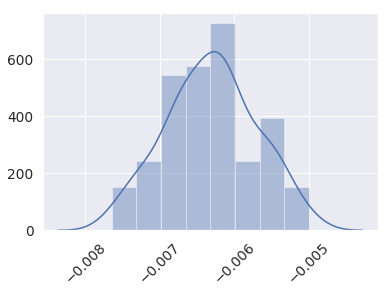

In [165]:
c4=0
for i in range(100):
    train70 = pd.concat([train7, y_train2], axis=1)
    train71 = train70.sample(1000)
    train71.rename(columns={ train71.columns[1]: "SalePrice" }, inplace = True)
    y_train1 = train71['SalePrice']
    train71 = train71.drop('KitchenAbvGr',axis=1)
    score,perm_score, pvalue= permutation_test_score(model2, train71, y_train1)
    c4=c4+perm_score
c4=c4/100
c4
s = sns.distplot(c4)
plt.xticks(rotation=45)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(array([-0.009, -0.008, -0.007, -0.006, -0.005, -0.004]),
 <a list of 6 Text xticklabel objects>)

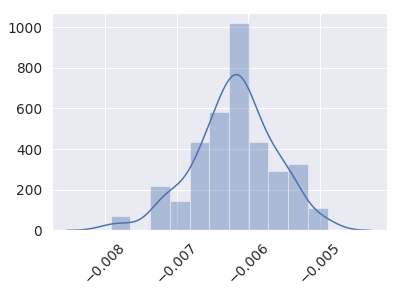

In [166]:
c5=0
for i in range(100):
    train80 = pd.concat([train8, y_train2], axis=1)
    train81 = train80.sample(1000)
    train81.rename(columns={ train81.columns[1]: "SalePrice" }, inplace = True)
    y_train1 = train81['SalePrice']
    train81 = train81.drop('SaleCondition',axis=1)
    score,perm_score, pvalue= permutation_test_score(model2, train81, y_train1)
    c5=c5+perm_score
c5=c5/100
c5
s = sns.distplot(c5)
plt.xticks(rotation=45)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(array([-0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003]),
 <a list of 7 Text xticklabel objects>)

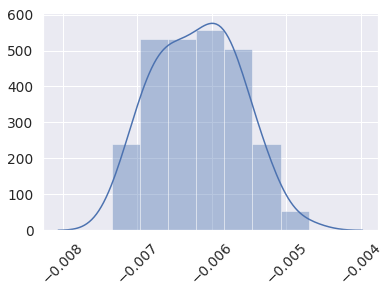

In [167]:
c6=0
for i in range(100):
    train100 = pd.concat([train9, y_train2], axis=1)
    train101 = train100.sample(1000)
    train101.rename(columns={ train101.columns[1]: "SalePrice" }, inplace = True)
    y_train1 = train101['SalePrice']
    train101 = train101.drop('YrSold',axis=1)
    score,perm_score, pvalue= permutation_test_score(model2, train101, y_train1)
    c6=c6+perm_score
c6=c6/100
c6
s = sns.distplot(c6)
plt.xticks(rotation=45)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(array([-0.009, -0.008, -0.007, -0.006, -0.005, -0.004]),
 <a list of 6 Text xticklabel objects>)

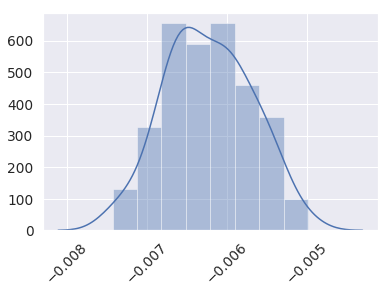

In [168]:
c7=0
for i in range(100):
    train110 = pd.concat([train10, y_train2], axis=1)
    train111 = train110.sample(1000)
    train111.rename(columns={ train111.columns[1]: "SalePrice" }, inplace = True)
    y_train1 = train111['SalePrice']
    train111 = train111.drop('LotArea',axis=1)
    score,perm_score, pvalue= permutation_test_score(model2, train111, y_train1)
    c7=c7+perm_score
c7=c7/100
c7
s = sns.distplot(c7)
plt.xticks(rotation=45)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(array([-0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003]),
 <a list of 7 Text xticklabel objects>)

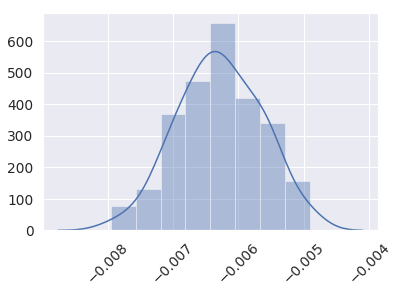

In [169]:
c8=0
for i in range(100):
    train120 = pd.concat([train11, y_train2], axis=1)
    train121 = train120.sample(1000)
    train121.rename(columns={ train121.columns[1]: "SalePrice" }, inplace = True)
    y_train1 = train121['SalePrice']
    train121 = train121.drop('CentralAir',axis=1)
    score,perm_score, pvalue= permutation_test_score(model2, train121, y_train1)
    c8=c8+perm_score
c8=c8/100
c8
s = sns.distplot(c8)
plt.xticks(rotation=45)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(array([-0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003]),
 <a list of 7 Text xticklabel objects>)

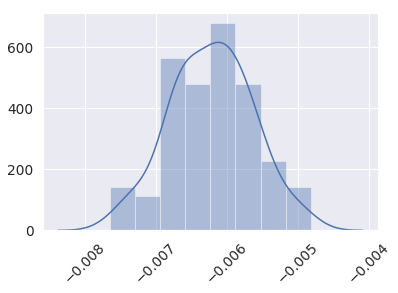

In [170]:
c9=0
for i in range(100):
    train130 = pd.concat([train12, y_train2], axis=1)
    train131 = train130.sample(1000)
    train131.rename(columns={ train131.columns[1]: "SalePrice" }, inplace = True)
    y_train1 = train131['SalePrice']
    train131 = train131.drop('FullBath',axis=1)
    score,perm_score, pvalue= permutation_test_score(model2, train131, y_train1)
    c9=c9+perm_score
c9=c9/100
c9
s = sns.distplot(c9)
plt.xticks(rotation=45)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(array([-0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003]),
 <a list of 7 Text xticklabel objects>)

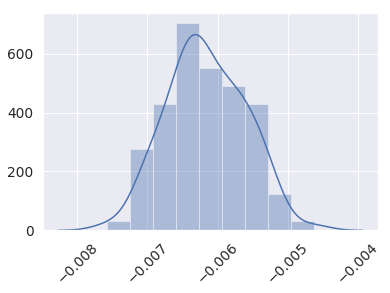

In [171]:
c10=0
for i in range(100):
    train140 = pd.concat([train13, y_train2], axis=1)
    train141 = train140.sample(1000)
    train141.rename(columns={ train141.columns[1]: "SalePrice" }, inplace = True)
    y_train1 = train141['SalePrice']
    train141 = train141.drop('HalfBath',axis=1)
    score,perm_score, pvalue= permutation_test_score(model2, train141, y_train1)
    c10=c10+perm_score
c10=c10/100
c10
s = sns.distplot(c10)
plt.xticks(rotation=45)

These are the p-values for the variables and also the permuatation scores. We can see that OverallQual, GrLivArea, KitcheenAbvGr and SaleCondition have a huge role to play and have strong correlation. While street as a low correlation as it is >0.05. Also the permuatations scores show the same picture. We see that after running the permutations for 100 iterations, we get that they show somewhat the same score. Not exactly same but it can be seen that this variance is actually necessary.

## Part 9 - Final Result

In [172]:
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(train3, y_train)
predicted_prices = GBoost.predict(test)
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})

my_submission.to_csv('submission.csv', index=False)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<a href="./submission.csv"> Download File </a>

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/golion/dsf-2

Highest Rank: 1997

Score: 0.13213

Number of entries: 5

https://drive.google.com/open?id=1x7GwpW0nWOYndwWWmhbgcpefGIEidK_6